In [1]:
import numpy as np
import random as random
import time as time
import matplotlib.pyplot as plt

#La documentación se realizó con ayuda de la IA DeepSeek

def Transpuesta(A):
    """
    Función que calcula la transpuesta de una matriz.

    Parámetros:
    A (list of list of float/int): Matriz de tamaño mxn (m filas y n columnas).

    Retorna:
    Transpuesta (numpy.ndarray): Matriz transpuesta de A, de tamaño nxm.

    Notas:
    - La transpuesta de una matriz se obtiene intercambiando filas por columnas.
    - La matriz resultante tiene dimensiones nxm, donde n es el número de columnas de A y m es el número de filas de A.
    """
    m = len(A)       # Número de filas de la matriz A.
    n = len(A[0])    # Número de columnas de la matriz A.
    Transpuesta = np.zeros((n, m))  # Inicializa la matriz transpuesta con ceros.

    # Calcula la transpuesta intercambiando filas por columnas.
    for i in range(n):
        for j in range(m):
            Transpuesta[i][j] = A[j][i]

    return Transpuesta  # Retorna la matriz transpuesta.

def ProductoPunto(X, Y):
    """
    Función que calcula el producto punto (producto escalar) de dos vectores.

    Parámetros:
    X (list of float/int): Primer vector de tamaño n.
    Y (list of float/int): Segundo vector de tamaño n.

    Retorna:
    XY (float/int): Resultado del producto punto entre X e Y.
                    Si los vectores no tienen la misma longitud, retorna un mensaje de error.

    Notas:
    - El producto punto solo se puede calcular para vectores de la misma longitud.
    - El resultado es un escalar (un número).
    """
    m = len(X)  # Longitud del vector X.
    n = len(Y)  # Longitud del vector Y.
    XY = 0      # Inicializa el resultado del producto punto.

    # Verifica que los vectores tengan la misma longitud.
    if m == n:
        # Calcula el producto punto.
        for i in range(n):
            XY += X[i] * Y[i]
    else:
        # Retorna un mensaje de error si los vectores no tienen la misma longitud.
        return 'El producto punto solo se puede realizar con vectores de la misma longitud'

    return XY  # Retorna el resultado del producto punto.

def ParticionFilas(X):
    """
    Función que extrae las filas de una matriz y las devuelve como una lista de vectores.

    Parámetros:
    X (list of list of float/int): Matriz de tamaño mxn (m filas y n columnas).

    Retorna:
    Filas (list of list of float/int): Lista de vectores, donde cada vector representa una fila de la matriz X.

    Notas:
    - Cada fila de la matriz se convierte en un vector independiente.
    - La función es útil para operaciones que requieren manipular filas individuales de una matriz.
    """
    m = len(X)  # Número de filas de la matriz X.
    Filas = []  # Inicializa la lista de filas.

    # Extrae cada fila de la matriz y la agrega a la lista.
    for i in range(m):
        Filas.append(X[i])

    return Filas  # Retorna la lista de filas.

def ParticionColumnas(X):
    """
    Función que extrae las columnas de una matriz y las devuelve como una lista de vectores.

    Parámetros:
    X (list of list of float/int): Matriz de tamaño mxn (m filas y n columnas).

    Retorna:
    Columnas (list of list of float/int): Lista de vectores, donde cada vector representa una columna de la matriz X.

    Notas:
    - Cada columna de la matriz se convierte en un vector independiente.
    - La función utiliza la función `Transpuesta` para convertir las columnas en filas y luego aplica `ParticionFilas`.
    """
    T = Transpuesta(X)  # Calcula la transpuesta de la matriz X.
    Columnas = ParticionFilas(T)  # Extrae las filas de la transpuesta (columnas de X).

    return Columnas  # Retorna la lista de columnas.

In [2]:
def Producto(X, Y):
    """
    Función que realiza el producto de dos matrices utilizando filas y columnas como bloques.

    Parámetros:
    X (list of list of float/int): Primera matriz de tamaño mxn (m filas y n columnas).
    Y (list of list of float/int): Segunda matriz de tamaño nxk (n filas y k columnas).

    Retorna:
    XY (numpy.ndarray): Matriz resultante del producto de X e Y, de tamaño mxk.
                        Si las matrices no tienen el mismo número de columnas que de filas,
                        retorna un mensaje de error.

    Notas:
    - La función utiliza filas de X y columnas de Y como bloques para realizar la multiplicación.
    - El producto punto se utiliza para multiplicar los bloques correspondientes.
    - La matriz resultante tiene dimensiones mxk, donde m es el número de filas de X y k es el número de columnas de Y.
    """
    n = len(X[0])  # Número de columnas de X.
    m = len(Y)     # Número de filas de Y.
    XY = np.zeros((len(X), len(Y[0])))  # Inicializa la matriz resultante con ceros.

    # Verifica que las matrices sean compatibles para la multiplicación.
    if n != m:
        return 'No se puede realizar el producto de matrices si no tienen el mismo número de columnas que de filas'

    # Divide las matrices en bloques (filas de X y columnas de Y).
    FilasX = ParticionFilas(X)      # Lista de filas de X (bloques).
    ColumnasY = ParticionColumnas(Y)  # Lista de columnas de Y (bloques).

    # Realiza el producto de matrices utilizando bloques.
    for i in range(len(X)):  # Recorre las filas de X.
        for j in range(len(Y[0])):  # Recorre las columnas de Y.
            # Calcula el producto punto entre la fila i de X y la columna j de Y.
            XY[i][j] = ProductoPunto(FilasX[i], ColumnasY[j])

    return XY  # Retorna la matriz resultante.

In [3]:
def MultMat(Mat1, Mat2):
    """
    Realiza la multiplicación de dos matrices.

    Parámetros:
    -----------
    Mat1 : numpy.ndarray
        Una matriz bidimensional de forma (n, m), donde 'n' es el número de filas
        y 'm' es el número de columnas.
    Mat2 : numpy.ndarray
        Una matriz bidimensional de forma (m, p), donde 'm' es el número de filas
        (debe coincidir con el número de columnas de Mat1) y 'p' es el número de
        columnas.

    Retorna:
    --------
    numpy.ndarray
        Una matriz bidimensional de forma (n, p) que representa el resultado de
        la multiplicación de Mat1 por Mat2.

    Ejemplo:
    --------
    >>> Mat1 = np.array([[1, 2, 3], [4, 5, 6]])
    >>> Mat2 = np.array([[7, 8], [9, 10], [11, 12]])
    >>> MultMat(Mat1, Mat2)
    array([[ 58.,  64.],
           [139., 154.]])
    """
    # Inicializa una matriz de ceros con las dimensiones adecuadas
    Mat3 = np.zeros((Mat1.shape[0], Mat2.shape[1]))

    # Itera sobre cada fila de la primera matriz
    for row in range(Mat1.shape[0]):
        # Itera sobre cada columna de la segunda matriz
        for col in range(Mat2.shape[1]):
            # Realiza la multiplicación y suma los productos
            for aux in range(Mat2.shape[0]):
                Mat3[row, col] += Mat1[row, aux] * Mat2[aux, col]

    # Devuelve la matriz resultante
    return Mat3

In [4]:
#Celda con el código que compara los tiempos de ejecución del producto de matrices de nxn por el método usual y el de bloques 
Tamaño = np.zeros(90) #Almacena los tamaños de las matrices de nxn con n = 10,...,100
Tiempo1 = np.zeros(90) #Almacena los tiempos de ejecución para el producto de matrices via el método de bloques
Tiempo2 = np.zeros(90) #Almacena los tiempos de ejecución para el producto de matrices mediante el método usual
for i in range(90):
    Tamaño[i] = i+10 #Llena Tamaño
    A = np.random.uniform(1,100,(i+10,i+10)) #Crea las A-matrices de nxn con números uniformemente aleatorios
    B = np.random.uniform(1,100,(i+10,i+10)) #Crea las B-matrices de nxn con números uniformemente aleatorios
    #Calcula el tiempo de ejecución del producto de matrices por bloques
    inicio = time.time()
    Producto(A,B)
    fin = time.time()
    tiempo = fin-inicio
    Tiempo1[i] = tiempo #Llena Tiempo1
    #Calcula el tiempo de ejecución del producto de matrices usual
    inicio2 = time.time()
    MultMat(A,B)
    fin2 = time.time()
    tiempo2 = fin2-inicio2
    Tiempo2[i] = tiempo2 #Llena Tiempo2

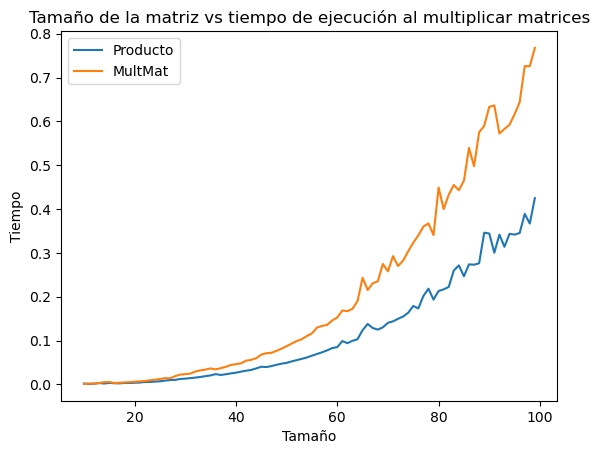

In [5]:
#Grafica el tamaño de las matrices involucradas en el producto vs el tiempo de ejecución de ambos métodos
plt.plot(Tamaño,Tiempo1,label='Producto')
plt.xlabel('Tamaño')
plt.ylabel('Tiempo')
plt.legend()
plt.plot(Tamaño,Tiempo2,label='MultMat')
plt.legend()
plt.title('Tamaño de la matriz vs tiempo de ejecución al multiplicar matrices')
plt.show()